# Examen de Tecnología de Fabricación (GIA) - 6/9/2017 - Problema de forja #

Se desea disminuir a 20 mm, si es posible, el espesor de barras prismáticas de acero 1008 en una prensa hidráulica con matrices planas. Se usa un aceite mineral como lubricante. Las barras tienen inicialmente una longitud $l_0=300$ mm, una anchura $w_0=50$ mm y un espesor $h_0=50$ mm. De un ensayo previo normalizado de compresión (con probetas cilíndricas) se conoce que el aumento del área en rotura del material es del $80\%$.

Suponiendo un estado de deformación plana, se obtiene la siguiente distribución de la presión ejercida por las matrices sobre el material:
\begin{equation*}
	\ln \frac{p}{\sigma_Y} = \mu \frac{w}{h} \left(1 - \frac{x}{w/2} \right)
\end{equation*}
siendo $x$ la distancia al centro de la pieza en la dirección del ancho, tal y como se indica en la sección de la barra deformada $h \times w$ de la figura.

![variables](2017-09-06_forja.png)

Conteste a las siguientes preguntas:
1. Calcule el espesor mínimo de una barra deformada sin grietas.
2. Calcule la tensión de fluencia del material de la barra anterior.
3. Calcule los valores máximo y mínimo de presión ejercida para obtener la barra anterior. Dibuje una gráfica con la distribución de presión sobre la sección $h \times w$.
4. Para la misma barra anterior, calcule la fuerza máxima realizada por la prensa.
5. Finalmente el proceso se hará a 1000 °C, con una velocidad de la prensa de 1 mm/s y un grafito como lubricante que tiene un coeficiente de fricción de 0.2. Calcule la presión máxima ejercida sobre la sección.

# Solución #

Datos conocidos:
- dimesiones iniciales de la barra
- hipótesis de deformación plana: longitud de la barra constante ($l=l_0$)
- ley de comportamiento tipo Hollomon ($\sigma_Y = K \, \varepsilon^n$) del acero 1008, según las tablas de propiedades mecánicas
- del ensayo de compresión, el aumento del área en rotura del material
- coeficción de fricción del aceite mineral ($\mu$), según las tablas de lubricantes recomendados

In [1]:
l=l0 = 300
w0 = 50
h0 = 50

K = 600
n = 0.25
def SY(deform):
    return K*deform**n

r = 0.8

mu = 0.1

## 1. Calcule el espesor mínimo de una barra deformada sin grietas. ##

Según el enunciado, se desea que el espesor final sea $h=20$ mm, pero sin grietas. A partir del aumento máximo de área:
$$ r = \frac{A - A_0}{A_0} \rightarrow \frac{A}{A_0} = \frac{l w}{l_0 w_0} = \frac{w}{w_0} = 1+r $$
se obtiene el espesor de la barra que puede alcanzarse:
$$ A h = A_0 h_0 \rightarrow h = h_0 \frac{A_0}{A} = h_0 \frac{1}{1+r} $$


In [2]:
h = h0/(1+r)
w = w0*h0/h
print("Espesor h = %0.1f mm, anchura w = %0.1f mm, relación w/h = %0.2f" %(h, w, w/h))

Espesor h = 27.8 mm, anchura w = 90.0 mm, relación w/h = 3.24


## 2. Calcule la tensión de fluencia del material de la barra anterior. ##

Dado que la barra se deforma justo hasta su límite de rotura, la máxima deformación posible será:
$$ \varepsilon = \ln \frac{A}{A_0} = \ln (1+r) $$
y la tensión de fluencia:
$$ \sigma_Y = K \varepsilon^n $$

In [3]:
import numpy as np
deform = np.log(1+r)
tens = SY(deform)
print("Deformación = %0.3f, tensión de fluencia = %0.1f MPa" %(deform, tens))

Deformación = 0.588, tensión de fluencia = 525.4 MPa


## 3. Calcule los valores máximo y mínimo de presión ejercida para obtener la barra anterior. Dibuje una gráfica con la distribución de presión sobre la sección $h \times w$. ##

La presión sigue una ley exponencial decreciente con $x$:
\begin{equation*}
	\ln \frac{p}{\sigma_Y} = \mu \frac{w}{h} \left(1 - \frac{x}{w/2} \right) \rightarrow p = \sigma_Y \cdot \exp\left[ \mu \frac{w}{h} \left( 1 - \frac{x}{w/2} \right) \right]
\end{equation*}

La presión es máxima justo en el centro de la superficie de contacto:
\begin{equation*}
	p_{max} = p(x=0) = \sigma_Y \exp\left( \mu\,w/h \right)
\end{equation*}
y mínima en sus extremos:
\begin{equation*}
	p_{min} = p(x=w/2) = \sigma_Y
\end{equation*}


Presión máxima = 726.4 MPa
Presión mínima = 525.4 MPa


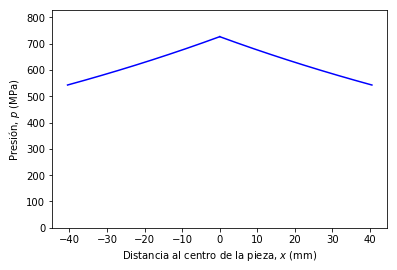

In [5]:
def p(x):
    return tens * np.exp(mu*w/h*(1-x/(w/2)))
pmax = p(0)
pmin = p(w/2)
print("Presión máxima = %0.1f MPa" %(pmax))
print("Presión mínima = %0.1f MPa" %(pmin))

import matplotlib.pyplot as plt
x = np.arange(0, w/2, w/20);
plt.plot(x, p(x), 'b-')
plt.plot(-x, p(x), 'b-')
plt.ylim(0, pmax+100)
plt.xlabel("Distancia al centro de la pieza, $x$ (mm)")
plt.ylabel("Presión, $p$ (MPa)")
plt.show()

## 4. Para la misma barra anterior, calcule la fuerza máxima realizada por la prensa. ##

La fuerza puede calcularse como la presión media por el área de contacto con las matrices planas:
\begin{equation*}
	F = \overline{p} \cdot w \, l
\end{equation*}
donde la presión media se calcula como:
\begin{equation*}
	\overline{p} = \frac{1}{w/2} \int_0^{w/2} p\, \mathrm{d}x = \sigma_Y \frac{\mathrm{e}^{\mu\,w/h} -1}{\mu\,w/h}
\end{equation*}

In [6]:
pmed = tens/(mu*w/h)*(np.exp(mu*w/h)-1)
F = pmed*w*l
print("pmed = %.1f MPa" %(pmed))
print("F = %.0f N = %.1f MN" %(F, F/10**6))

pmed = 620.5 MPa
F = 16752267 N = 16.8 MN


## 5. Finalmente el proceso se hará a 1000 °C, con una velocidad de la prensa de 1 mm/s y un grafito como lubricante que tiene un coeficiente de fricción de 0.2. Calcule la presión máxima ejercida sobre la sección. ##

Se producen los siguientes cambios:
- Nueva ley de comportamiento en caliente: $\sigma_Y = C \, \dot{\varepsilon}^m$, con $\dot{\varepsilon}=v/h$.
- En caliente aumenta la ductilidad así que se asume que pueden obtenerse barras de 20 mm de espesor.
- Lubricante (grafito según las tablas de lubricantes recomendados): $\mu=0.2$

Sección deformada: h = 20 mm, w = 125.0 mm
Velocidad de deformación = 0.050 s^-1
Tensión de fluencia = 74.1 MPa
Evolución tensión-deformación en frío y caliente:


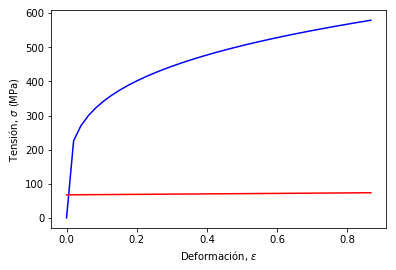

Presión máxima en caliente: pmax = 258.7 MPa
Presión mínima en caliente: pmim = 105.2 MPa
Distribución final de la presión en frío y caliente:


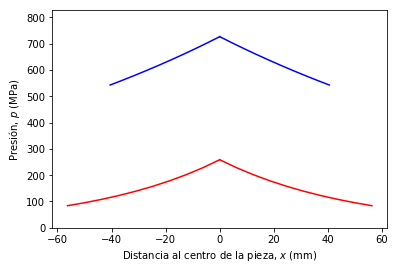

In [7]:
C = 100
m = 0.1
def SY1000(vdef):
    return C*vdef**m

h2 = 20
w2 = w0*h0/h2
print("Sección deformada: h = 20 mm, w = %.1f mm" %(w2))

v = 1         # en mm/s
def vd(v, h): # en s^-1
    return v/h
vdef = vd(v, h2)    # en s^-1
tens2 = SY1000(vdef)
print("Velocidad de deformación = %.3f s^-1" %(vdef))
print("Tensión de fluencia = %.1f MPa" %(tens2))

print("Evolución tensión-deformación en frío y caliente:")
hx = np.arange(h0, h2, -1);
plt.plot(np.log(h0/hx), SY(np.log(h0/hx)), 'b-')
plt.plot(np.log(h0/hx), SY1000(vd(v, hx)), 'r-')
plt.xlabel(r"Deformación, $\varepsilon$")
plt.ylabel(r"Tensión, $\sigma$ (MPa)")
plt.show()

mu2=0.2
def p1000(x):
    return tens2 * np.exp(mu2*w2/h2*(1 - x*2/w2))
def p1000(x):
    return tens2 * np.exp(1.25*(1 - x/62.5))
p2max = p1000(0)
p2min = p1000(w/2)
print("Presión máxima en caliente: pmax = %.1f MPa" %(p2max))
print("Presión mínima en caliente: pmim = %.1f MPa" %(p2min))

print("Distribución final de la presión en frío y caliente:")
x = np.arange(0, w/2, w/20);
x2 = np.arange(0, w2/2, w2/20);
plt.plot(x, p(x), 'b-')
plt.plot(-x, p(x), 'b-')
plt.plot(x2, p1000(x2), 'r-')
plt.plot(-x2, p1000(x2), 'r-')
plt.ylim(0, pmax+100)
plt.xlabel("Distancia al centro de la pieza, $x$ (mm)")
plt.ylabel("Presión, $p$ (MPa)")
plt.show()